In [2]:
import sys
sys.path.append("..")

import time

import numpy as np
import matplotlib.pyplot as plt

from drawdown import PortfolioSeries

In [3]:
#First we load the data. Since we only care about relative profit, we simply
#divide the stock prices by the first row in our data
values = np.load('values.npy') #(N measured times, D stocks)
values = values/values[0, :]
#We first skip some data just to show the concept, without much computational burden.
skip = 10 #skip = 1 means no skip. It will take a while for computing
values = values[::skip, :]

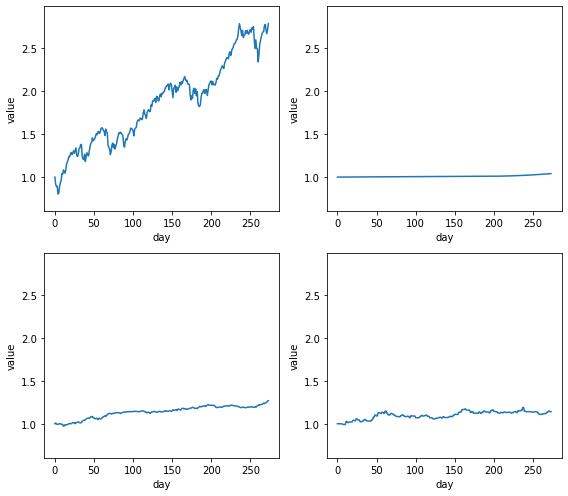

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8,7))
for i in range(values.shape[-1]):
    ax = axes.flatten()[i]
    ax.plot(values[:, i])
    ax.set_ylim(bottom=np.min(values)-0.2, top=np.max(values)+0.2)
    ax.set_xlabel('day')
    ax.set_ylabel('value')
fig.tight_layout()

In [5]:
def drawdowns(series):
    #Calculates the drawdown curve and the maximum drawdown
    drawdowns = np.zeros_like(series)
    maxdrawdowns = np.zeros_like(series)
    for i,n in enumerate(series):
        if i == 0:
            peak = series[0]
        else:
            current = series[i]
            if current > peak:
                peak = current
            drawdowns[i] = (peak-current)/current
            if drawdowns[i] >= maxdrawdowns[i-1]:
                maxdrawdowns[i] = drawdowns[i]
            else:
                maxdrawdowns[i] = maxdrawdowns[i-1]
    return drawdowns,maxdrawdowns

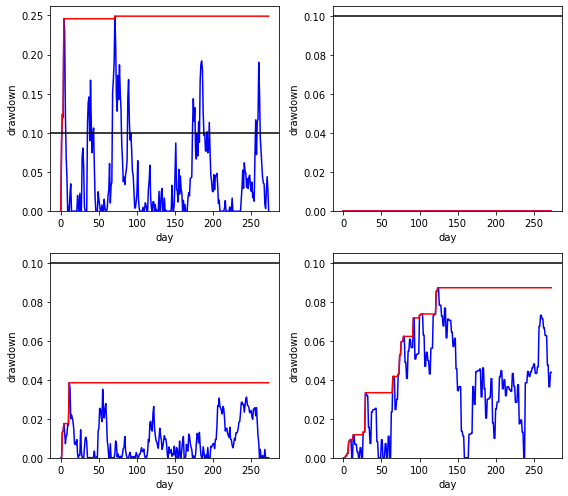

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(8,7))
for i in range(values.shape[-1]):
    dd, maxdd = drawdowns(values[:, i])
    ax = axes.flatten()[i]
    ax.plot(dd, color='blue', label='DD')
    ax.plot(maxdd, color='red', label='max DD')
    ax.axhline(0.1, color='black')
    ax.set_ylim(0.0)
    ax.set_xlabel('day')
    ax.set_ylabel('drawdown')
fig.tight_layout()

In [7]:
#Now we initialize our optimizer
actual_dd_limit = 0.1
safety_factor = 0.8
dd_limit = actual_dd_limit*safety_factor
portfolio = PortfolioSeries(values)

In [8]:
#Actual calculation
lambd1 = 4000.0
lambd2 = 1.0
begin = time.time()
res = portfolio.solve_portfolio(dd_limit, lambd1, lambd2)
end = time.time()
print(f"{end - begin} s")

4.183788537979126 s


In [9]:
portfolio_value = portfolio.return_series() #Get the value of portfolio
portfolio_dd, portfolio_maxdd = drawdowns(portfolio_value) #Calculate it's drawdowns

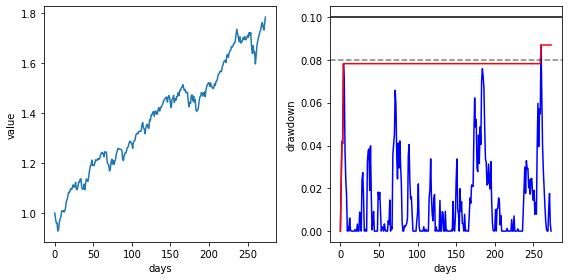

In [10]:
#We show the results of our computation
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(portfolio_value)
axes[0].set_xlabel('days')
axes[0].set_ylabel('value')

axes[1].plot(portfolio_dd, color='blue', label='DD')
axes[1].plot(portfolio_maxdd, color='red', label='max DD')
axes[1].axhline(actual_dd_limit, color='black')
axes[1].axhline(dd_limit, color='black', alpha=0.5, linestyle='--')
axes[1].set_xlabel('days')
axes[1].set_ylabel('drawdown')

fig.tight_layout()